In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

For the final project we decided to work with the covid-19 dataset because we were intererested in exploring the intersection between covid-19 and socio-economic status.

In [100]:
states = pd.read_csv("covid19/4.18states.csv")
abridged_counties = pd.read_csv("covid19/abridged_couties.csv")
us_confirmed = pd.read_csv("covid19/time_series_covid19_confirmed_US.csv")
us_deaths = pd.read_csv("covid19/time_series_covid19_deaths_US.csv")

In [101]:
abridged_counties.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


In [59]:
abridged_counties.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [60]:
states.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [61]:
us_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,50,51,51,51,51,51,51,51,53


In [62]:
us_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,1,1,1,2,3


Since longitude and latitude columns have a lot of null values and are not pertinent to our end goal, we have decided not to use thsoe columns.

In [63]:
socio_counties = abridged_counties[['CountyName', 'StateName', 'SVIPercentile', 'HPSAShortage', 
        'HPSAServedPop', 'HPSAUnderservedPop', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017']]

<BarContainer object of 52 artists>

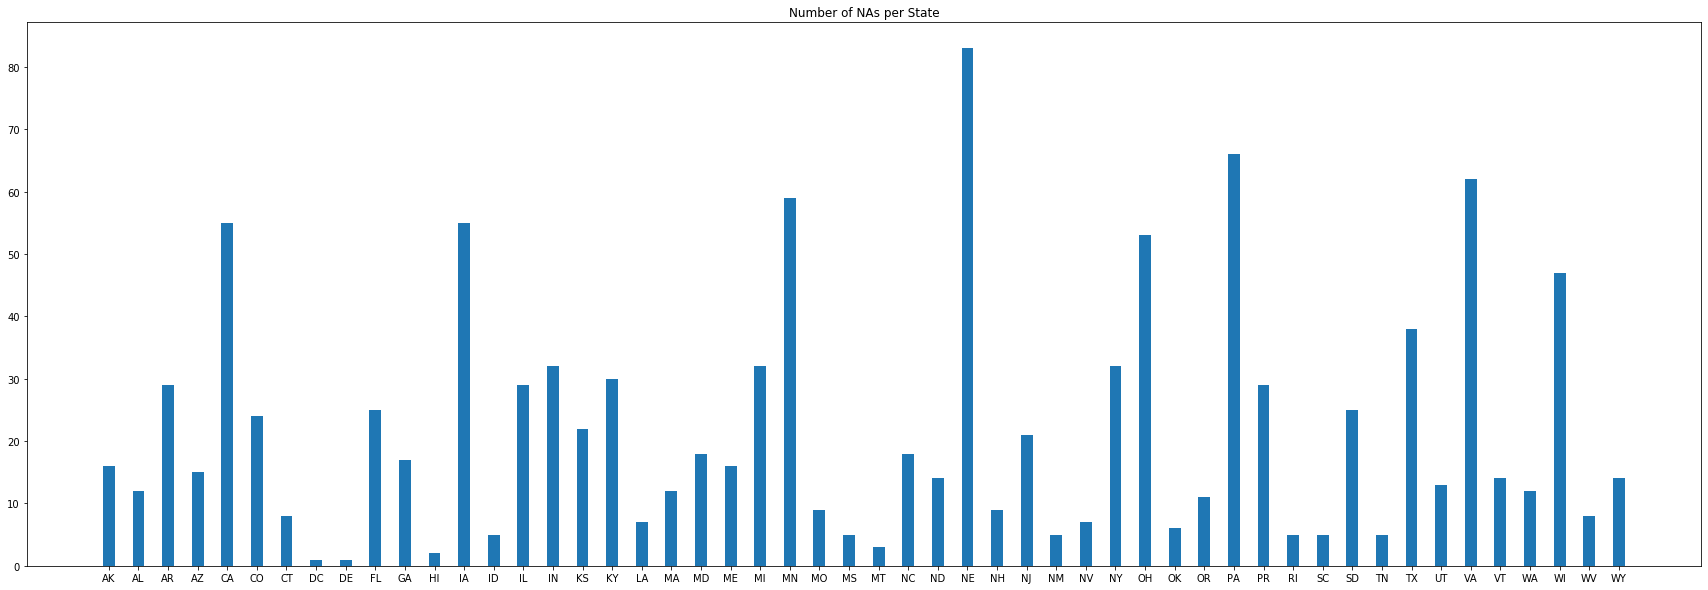

In [64]:
plt.figure(figsize=(30,10))
plt.title('Number of NAs per State')
county_nas = socio_counties[socio_counties['HPSAShortage'].isna()].groupby('StateName').count().reset_index()
plt.bar(county_nas['StateName'], county_nas['CountyName'], .4)

### Steps to cleaning up the data set
The missing date from the third column and after is being imputed with the mean of .....

In [65]:
for i in socio_counties.columns[2:]:
    socio_counties.loc[:, i] = socio_counties[i].fillna(socio_counties.groupby('StateName')[i].transform('mean'))

socio_counties

/Users/divineechidume/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,CountyName,StateName,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,#EligibleforMedicare2018,"MedicareEnrollment,AgedTot2017"
0,Autauga,AL,0.435400,4.394415,22099.309091,13454.418182,11439.000000,8046.000000
1,Baldwin,AL,0.216200,4.394415,22099.309091,13454.418182,54145.000000,41590.000000
2,Barbour,AL,0.995900,6.080000,5400.000000,18241.000000,6681.000000,4706.000000
3,Bibb,AL,0.600300,2.750000,14980.000000,6120.000000,5128.000000,3389.000000
4,Blount,AL,0.424200,7.210000,31850.000000,25233.000000,13175.000000,9542.000000
...,...,...,...,...,...,...,...,...
3239,Kalawao,HI,0.316200,20.933333,66920.000000,73273.666667,69541.750000,0.000000
3240,Ciales Municipio,PR,NaN,43.784082,2209.591837,131445.612245,5152.000000,2960.000000
3241,Humacao Municipio,PR,NaN,43.784082,2209.591837,131445.612245,19035.000000,12583.000000
3242,New York City,NY,0.468610,6.933987,6819.354839,20841.774194,60258.274194,47938.290323


<BarContainer object of 7 artists>

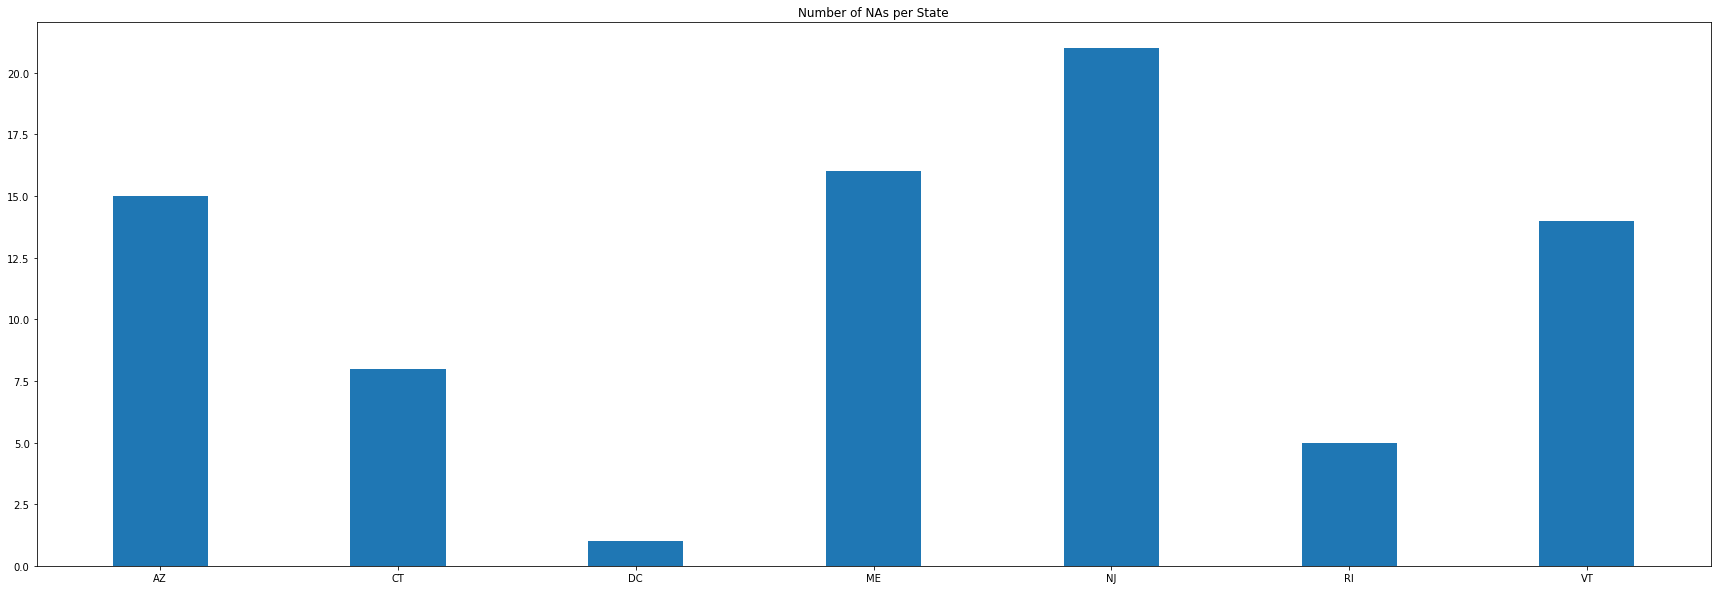

In [66]:
plt.figure(figsize=(30,10))
plt.title('Number of NAs per State')
county_nas = socio_counties[socio_counties['HPSAShortage'].isna()].groupby('StateName').count().reset_index()
plt.bar(county_nas['StateName'], county_nas['CountyName'], .4)

Notice that even after filtering some of the entries still have null values..... To further clean data filter out rows that still have null values in certain columns.

In [69]:
socio_counties_filtered = socio_counties[socio_counties.SVIPercentile.notnull() 
                                         & socio_counties.HPSAShortage.notnull()
                                         & socio_counties.HPSAServedPop.notnull()
                                         & socio_counties.HPSAUnderservedPop.notnull()
                                         & socio_counties['#EligibleforMedicare2018'].notnull()
                                         & socio_counties['MedicareEnrollment,AgedTot2017'].notnull()]


In [154]:
socio_counties_filtered['StateName']

0       AL
1       AL
2       AL
3       AL
4       AL
        ..
3237    AK
3238    AK
3239    HI
3242    NY
3243    MO
Name: StateName, Length: 3072, dtype: object

In [130]:
states

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Xinjiang,China,NaN,41.1129,85.2401,76,3,73.0,0.0,NaN,0.305589,NaN,NaN,3.947368,15629,CHN,NaN,NaN
136,Yukon,Canada,NaN,64.2823,-135.0000,9,0,0.0,9.0,NaN,21.909538,NaN,NaN,0.000000,12412,CAN,NaN,NaN
137,Yunnan,China,NaN,24.9740,101.4870,184,2,177.0,5.0,NaN,0.380952,NaN,NaN,1.086957,15630,CHN,NaN,NaN
138,Zhejiang,China,NaN,29.1832,120.0934,1268,1,1246.0,21.0,NaN,2.210214,NaN,NaN,0.078864,15631,CHN,NaN,NaN


In [140]:
states_covid = states[['Province_State', 'Country_Region',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate']]


states_covid_filtered = states_covid[states_covid['Country_Region'] == 'US']
states_covid_filtered = states_covid_filtered[states_covid_filtered.People_Tested.notnull() &
                                              states_covid_filtered.People_Hospitalized.notnull()]
states_covid_filtered

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,4712,153,NaN,4559.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,314,9,147.0,305.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
3,Arizona,US,4724,180,539.0,4544.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,1744,38,703.0,1706.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780
5,California,US,30491,1140,NaN,29351.0,77.766063,251614.0,4892.0,3.738808,84000006,USA,641.731334,16.044079
6,Colorado,US,9047,389,NaN,8658.0,159.648818,43307.0,1755.0,4.299768,84000008,USA,764.221442,19.398696
7,Connecticut,US,17550,1086,NaN,16464.0,492.246487,55462.0,1946.0,6.188034,84000009,USA,1555.611091,11.088319
8,Delaware,US,2538,67,423.0,2471.0,260.638101,14017.0,224.0,2.639874,84000010,USA,1439.465825,8.825847
10,District of Columbia,US,2666,91,608.0,2575.0,377.754697,13268.0,313.0,3.413353,84000011,USA,1879.988494,11.740435
11,Florida,US,25492,748,NaN,24744.0,120.060628,246527.0,3842.0,2.934254,84000012,USA,1161.077449,15.071395


### Interesting find
Dropping all of the rows that had null values for the number of people tested and people hospitalized left us with data from states and territories in the United States. Another intested things is for rows that don't have any covid-19 recoveries, have null values instead of zeros, so here we are just imputing them with 0 instead of just dropping thsoe rows.

In [145]:
states_covid_filtered.loc[:,'Recovered'] = states_covid_filtered['Recovered'].fillna(0)
states_covid_filtered

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,4712,153,0.0,4559.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,314,9,147.0,305.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
3,Arizona,US,4724,180,539.0,4544.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,1744,38,703.0,1706.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780
5,California,US,30491,1140,0.0,29351.0,77.766063,251614.0,4892.0,3.738808,84000006,USA,641.731334,16.044079
6,Colorado,US,9047,389,0.0,8658.0,159.648818,43307.0,1755.0,4.299768,84000008,USA,764.221442,19.398696
7,Connecticut,US,17550,1086,0.0,16464.0,492.246487,55462.0,1946.0,6.188034,84000009,USA,1555.611091,11.088319
8,Delaware,US,2538,67,423.0,2471.0,260.638101,14017.0,224.0,2.639874,84000010,USA,1439.465825,8.825847
10,District of Columbia,US,2666,91,608.0,2575.0,377.754697,13268.0,313.0,3.413353,84000011,USA,1879.988494,11.740435
11,Florida,US,25492,748,0.0,24744.0,120.060628,246527.0,3842.0,2.934254,84000012,USA,1161.077449,15.071395


In [149]:
us_confirmed.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4

In [150]:
us_confirmed

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,50,51,51,51,51,51,51,51,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,0,0,1,1,0,0,0
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
3252,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0000,0.0000,...,103,103,103,103,103,103,103,103,103,103
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.0000,0.0000,...,0,0,0,0,370,429,472,472,514,550
